<a href="https://colab.research.google.com/github/MarcoParola/torre-clima/blob/main/experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
import collections 
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from keras import optimizers
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


projectPath = 'drive/MyDrive/Colab Notebooks/leaning_tower/'
DATA_FILE = projectPath + 'data/preprocessed_data.csv'

def evaluate(model, data, actual):
  pred = model.predict(data)
  resid = np.squeeze(actual) - np.squeeze(pred)

  font = {'size'   : 16}
  plt.rc('font', **font)
  plt.rcParams["figure.figsize"] = (9,8)

  mse = mean_squared_error(np.squeeze(actual), np.squeeze(pred))
  print(resid, mse)
  std_mse = np.std(resid)
  print('R^2: ', r2_score(np.squeeze(actual), np.squeeze(pred)), '\nMAE', mse, '\nSTD MAE', std_mse)


  plt.plot([-2, 2], [-2, 2], c='orange', linewidth=4, alpha=.7)
  plt.scatter(np.squeeze(actual), np.squeeze(pred), s=5, alpha=.5)
  plt.title('Actual Damage Level vs Predicted values')
  plt.xlabel('Actual Damage Level')
  plt.ylabel('Predicted values')
  plt.show()

  x = range(len(resid))
  plt.title('Residuals')
  plt.xlabel('index')
  plt.ylabel('displacement')
  plt.plot([0, len(resid)], [0, 0], linewidth=4, c='orange', alpha=.8)
  plt.scatter(x, resid, s=5, alpha=.5)
  plt.show()

In [ ]:
df = pd.read_csv(DATA_FILE, sep=',')

input_keys = ['Termometro Aria Piano 8', 'Irraggiamento Solare',
              'Velocita vento istantanea','Direzione vento istantanea', 
              'Pressione atmosferica']

target_channels = ['Date time',
       'TEL. 0 VERT. SUD DIR. N-S', 'TEL. 0 VERT. SUD DIR. E-O', 'Velocita vento istantanea',
       'Direzione vento istantanea', 'Termometro Aria Piano 8',
       'Irraggiamento Solare', 'TEL. 1 VERT. EST DIR. N-S',
       'TEL. 1 VERT. EST DIR. E-O', 'Pressione atmosferica', 'Deformometro 1',
       'Deformometro 2', 'Deformometro 3', 'Deformometro 4', 'Deformometro 5',
       'Deformometro 6', 'Deformometro 8', 'Deformometro 9', 'Deformometro 11',
       'Deformometro 12']

## **Deformometro 1**

In [ ]:
output_keys = ['Deformometro 1']

input = df[input_keys].values
output = df[output_keys].values

input, output = shuffle(input, output, random_state=0)

split = int(len(output) * 0.8)

train_data, test_data = input[:split,:], input[split:,:]
train_label, test_label = output[:split,:], output[split:,:]
train_data = np.expand_dims(train_data, axis=1)
test_data = np.expand_dims(test_data, axis=1)

### lin reg

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 1)              6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
359/359 [==============================] - 2s 2ms/step - loss: 1.8301 - accuracy: 0.0000e+00 - val_loss: 1.3113 - val_accuracy: 0.0000e+00
Epoch 2/150
359/359 [==============================] - 1s 2ms/step - loss: 1.1068 - accuracy: 0.0000e+00 - val_loss: 0.8153 - val_accuracy: 0.0000e+00
Epoch 3/150
359/359 [==============================] - 1s 2ms/step - loss: 0.7011 - accuracy: 0.0000e+00 - val_loss: 0.5366 - val_accuracy: 0.0000e+00
Epoch 4/150
359/359 [==============================] - 1s 2ms/step - loss: 0.4794 - accuracy: 0.0000e+00 - val_loss: 0.3903 - val_accurac

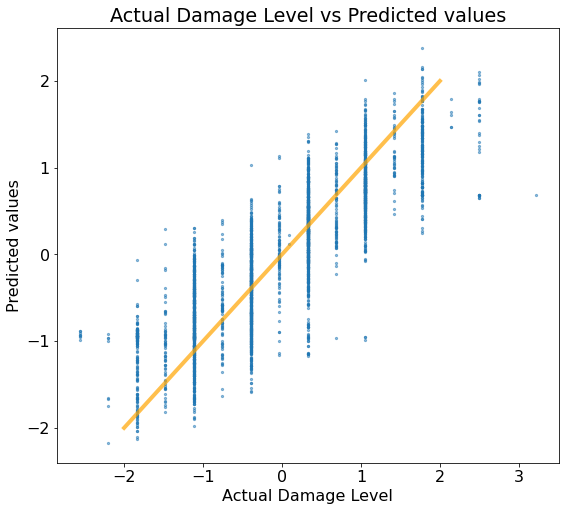

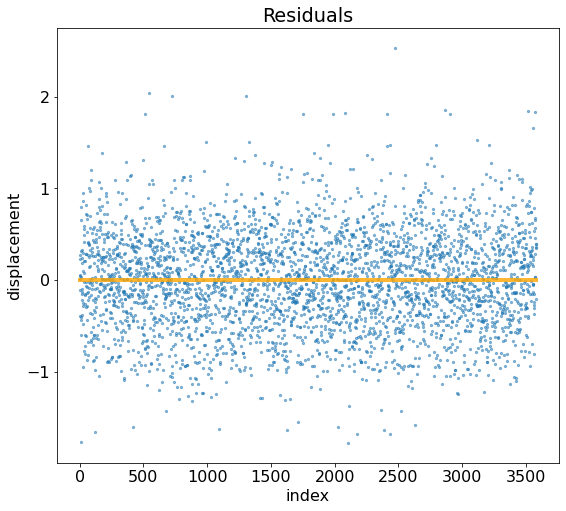

In [ ]:
tf.random.set_seed(7)

model = models.Sequential()
model.add(layers.Dense(1, input_shape=(1,5)))
model.summary()

model.compile(optimizer= optimizers.Adam(),
              loss='mse',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_data, train_label, epochs=150, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

evaluate(model, test_data, test_label)

### FF-NN

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1, 5)              30        
                                                                 
 dense_2 (Dense)             (None, 1, 16)             96        
                                                                 
 dense_3 (Dense)             (None, 1, 1)              17        
                                                                 
Total params: 143
Trainable params: 143
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
359/359 [==============================] - 2s 3ms/step - loss: 0.4481 - accuracy: 0.0000e+00 - val_loss: 0.3041 - val_accuracy: 0.0000e+00
Epoch 2/150
359/359 [==============================] - 1s 2ms/step - loss: 0.2878 - accuracy: 0.0000e+00 - val_loss: 0.2762 - val_accuracy: 0.0000e+00
Epoch 3/150
359/35

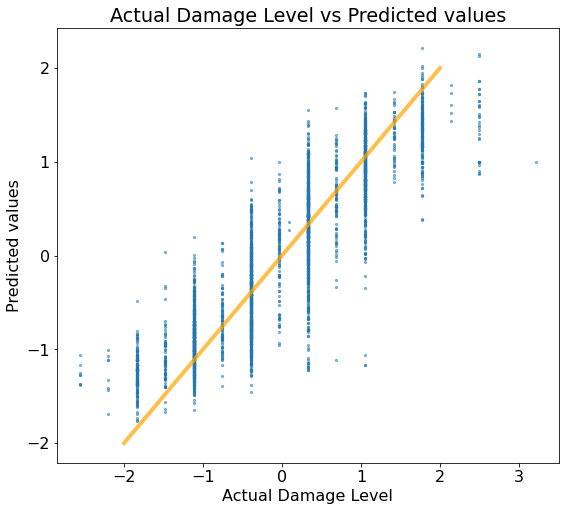

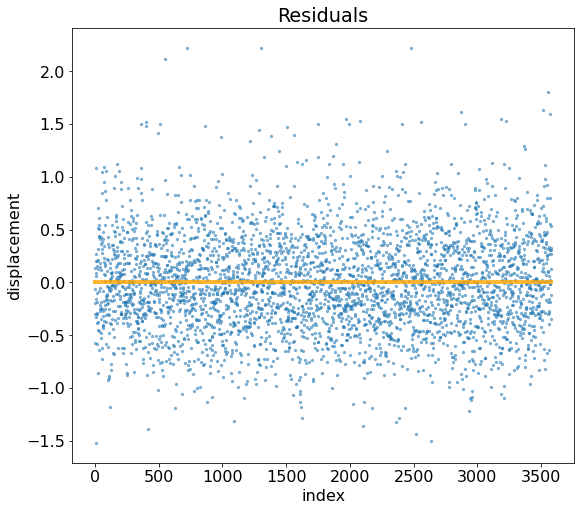

In [ ]:
tf.random.set_seed(7)

model = models.Sequential()
model.add(layers.Dense(5, input_shape=(1,5), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer= optimizers.Adam(),
              loss='mse',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_data, train_label, epochs=150, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

evaluate(model, test_data, test_label)

## **Deformometro 2**

In [ ]:
output_keys = ['Deformometro 2']

input = df[input_keys].values
output = df[output_keys].values

input, output = shuffle(input, output, random_state=0)

split = int(len(output) * 0.8)

train_data, test_data = input[:split,:], input[split:,:]
train_label, test_label = output[:split,:], output[split:,:]
train_data = np.expand_dims(train_data, axis=1)
test_data = np.expand_dims(test_data, axis=1)

### lin reg

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1, 1)              6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
359/359 [==============================] - 1s 2ms/step - loss: 1.9236 - accuracy: 0.0000e+00 - val_loss: 1.3806 - val_accuracy: 0.0000e+00
Epoch 2/150
359/359 [==============================] - 2s 5ms/step - loss: 1.1564 - accuracy: 0.0000e+00 - val_loss: 0.8497 - val_accuracy: 0.0000e+00
Epoch 3/150
359/359 [==============================] - 1s 4ms/step - loss: 0.7174 - accuracy: 0.0000e+00 - val_loss: 0.5446 - val_accuracy: 0.0000e+00
Epoch 4/150
359/359 [==============================] - 1s 3ms/step - loss: 0.4717 - accuracy: 0.0000e+00 - val_loss: 0.3798 - val_accur

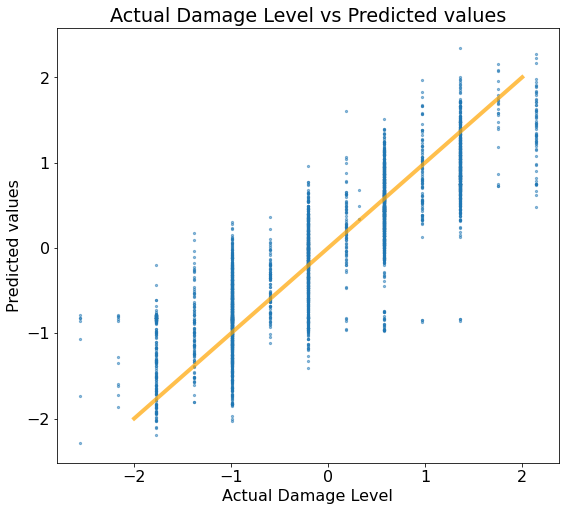

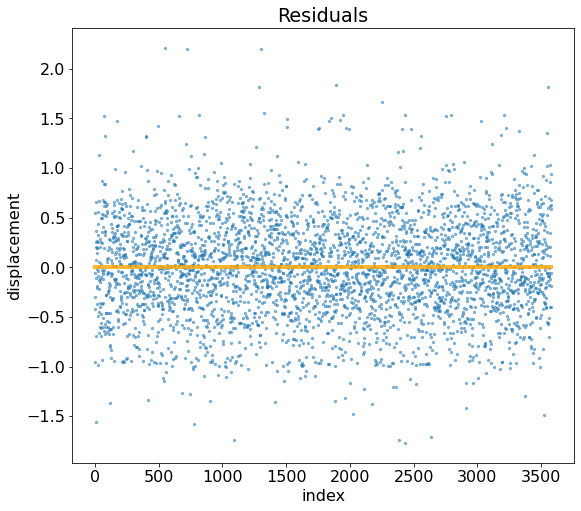

In [ ]:
tf.random.set_seed(7)

model = models.Sequential()
model.add(layers.Dense(1, input_shape=(1,5)))
model.summary()

model.compile(optimizer= optimizers.Adam(),
              loss='mse',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_data, train_label, epochs=150, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

evaluate(model, test_data, test_label)

### FF-NN

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1, 5)              30        
                                                                 
 dense_6 (Dense)             (None, 1, 16)             96        
                                                                 
 dense_7 (Dense)             (None, 1, 1)              17        
                                                                 
Total params: 143
Trainable params: 143
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
359/359 [==============================] - 3s 5ms/step - loss: 0.4173 - accuracy: 0.0000e+00 - val_loss: 0.2715 - val_accuracy: 0.0000e+00
Epoch 2/150
359/359 [==============================] - 1s 2ms/step - loss: 0.2447 - accuracy: 0.0000e+00 - val_loss: 0.2431 - val_accuracy: 0.0000e+00
Epoch 3/150
359/35

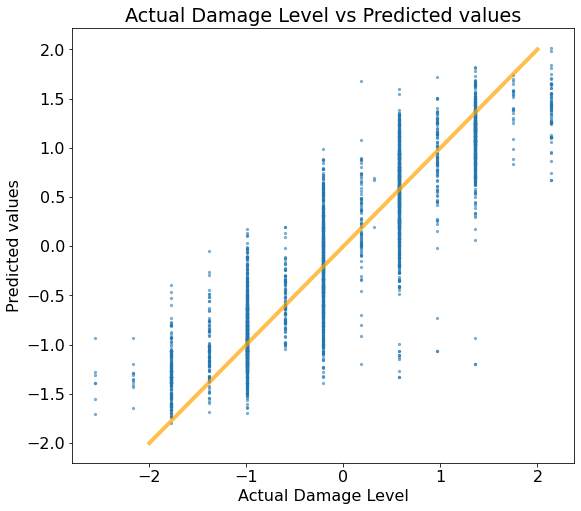

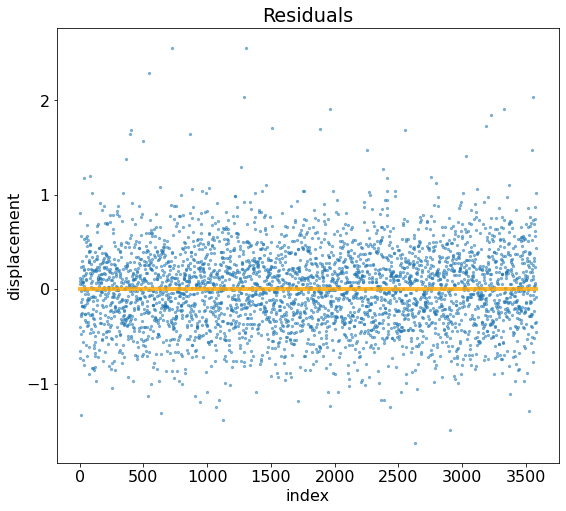

In [ ]:
tf.random.set_seed(7)

model = models.Sequential()
model.add(layers.Dense(5, input_shape=(1,5), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer= optimizers.Adam(),
              loss='mse',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_data, train_label, epochs=150, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

evaluate(model, test_data, test_label)

## **Deformometro 3**

In [ ]:
output_keys = ['Deformometro 3']

input = df[input_keys].values
output = df[output_keys].values

input, output = shuffle(input, output, random_state=0)

split = int(len(output) * 0.8)

train_data, test_data = input[:split,:], input[split:,:]
train_label, test_label = output[:split,:], output[split:,:]
train_data = np.expand_dims(train_data, axis=1)
test_data = np.expand_dims(test_data, axis=1)

### lin reg

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1, 1)              6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
359/359 [==============================] - 1s 2ms/step - loss: 2.0258 - accuracy: 0.0000e+00 - val_loss: 1.4582 - val_accuracy: 0.0000e+00
Epoch 2/150
359/359 [==============================] - 1s 2ms/step - loss: 1.2340 - accuracy: 0.0000e+00 - val_loss: 0.9043 - val_accuracy: 0.0000e+00
Epoch 3/150
359/359 [==============================] - 1s 2ms/step - loss: 0.7700 - accuracy: 0.0000e+00 - val_loss: 0.5835 - val_accuracy: 0.0000e+00
Epoch 4/150
359/359 [==============================] - 1s 2ms/step - loss: 0.5065 - accuracy: 0.0000e+00 - val_loss: 0.4084 - val_accur

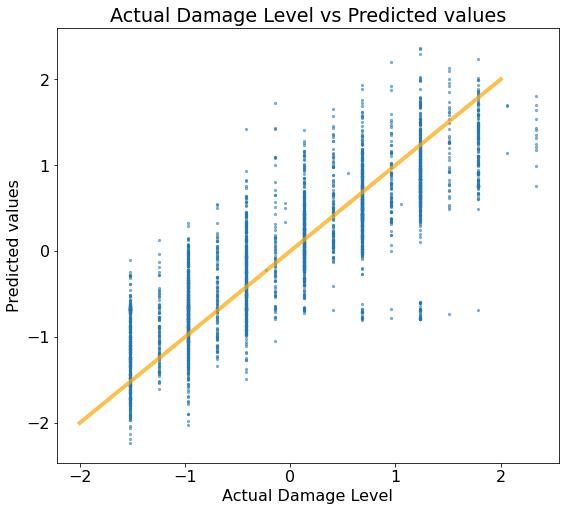

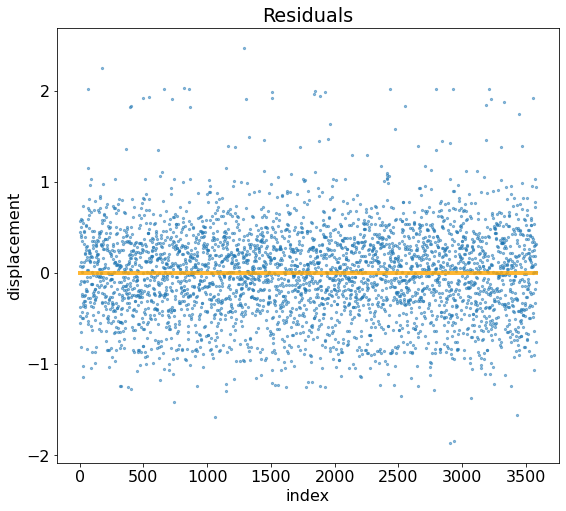

In [ ]:
tf.random.set_seed(7)

model = models.Sequential()
model.add(layers.Dense(1, input_shape=(1,5)))
model.summary()

model.compile(optimizer= optimizers.Adam(),
              loss='mse',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_data, train_label, epochs=150, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

evaluate(model, test_data, test_label)

### FF-NN

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1, 5)              30        
                                                                 
 dense_10 (Dense)            (None, 1, 16)             96        
                                                                 
 dense_11 (Dense)            (None, 1, 1)              17        
                                                                 
Total params: 143
Trainable params: 143
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
359/359 [==============================] - 1s 3ms/step - loss: 0.4311 - accuracy: 0.0000e+00 - val_loss: 0.2860 - val_accuracy: 0.0000e+00
Epoch 2/150
359/359 [==============================] - 1s 2ms/step - loss: 0.2539 - accuracy: 0.0000e+00 - val_loss: 0.2547 - val_accuracy: 0.0000e+00
Epoch 3/150
359/35

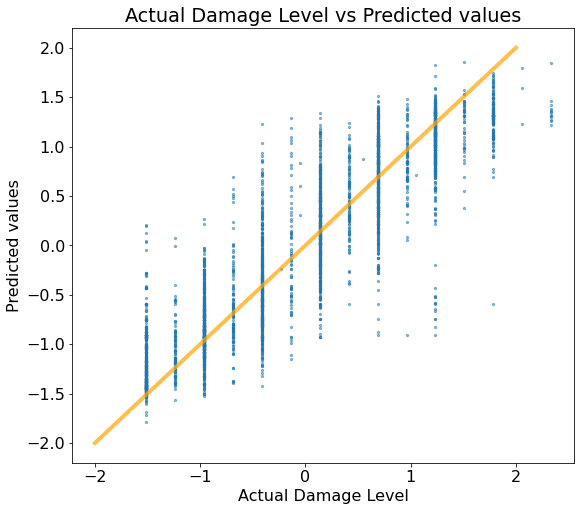

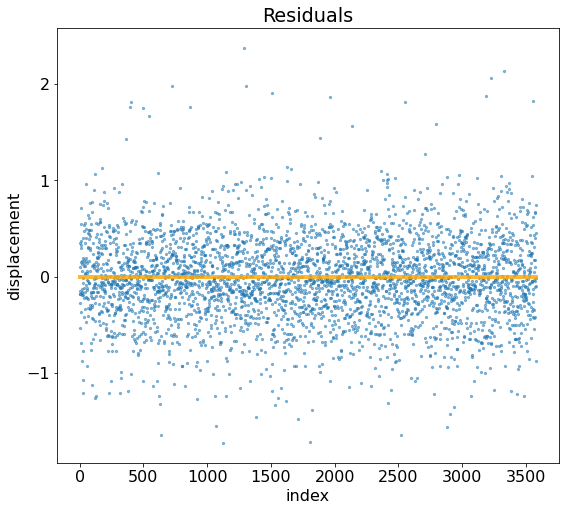

In [ ]:
tf.random.set_seed(7)

model = models.Sequential()
model.add(layers.Dense(5, input_shape=(1,5), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer= optimizers.Adam(),
              loss='mse',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_data, train_label, epochs=150, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

evaluate(model, test_data, test_label)

## **Deformometro 4**

In [ ]:
output_keys = ['Deformometro 4']

input = df[input_keys].values
output = df[output_keys].values

input, output = shuffle(input, output, random_state=0)

split = int(len(output) * 0.8)

train_data, test_data = input[:split,:], input[split:,:]
train_label, test_label = output[:split,:], output[split:,:]
train_data = np.expand_dims(train_data, axis=1)
test_data = np.expand_dims(test_data, axis=1)

### lin reg

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1, 1)              6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
359/359 [==============================] - 1s 2ms/step - loss: 2.0376 - accuracy: 0.0000e+00 - val_loss: 1.4743 - val_accuracy: 0.0000e+00
Epoch 2/150
359/359 [==============================] - 1s 2ms/step - loss: 1.2366 - accuracy: 0.0000e+00 - val_loss: 0.9035 - val_accuracy: 0.0000e+00
Epoch 3/150
359/359 [==============================] - 1s 2ms/step - loss: 0.7597 - accuracy: 0.0000e+00 - val_loss: 0.5647 - val_accuracy: 0.0000e+00
Epoch 4/150
359/359 [==============================] - 1s 2ms/step - loss: 0.4819 - accuracy: 0.0000e+00 - val_loss: 0.3738 - val_accur

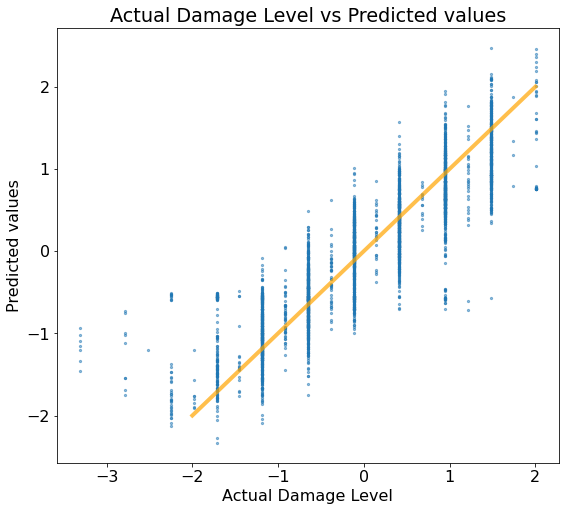

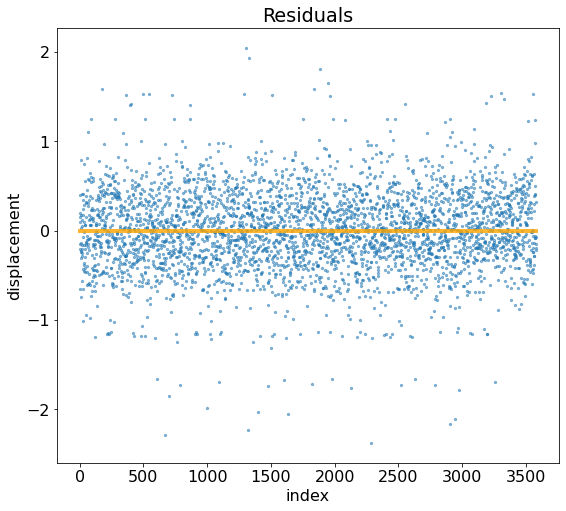

In [ ]:
tf.random.set_seed(7)

model = models.Sequential()
model.add(layers.Dense(1, input_shape=(1,5)))
model.summary()

model.compile(optimizer= optimizers.Adam(),
              loss='mse',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_data, train_label, epochs=150, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

evaluate(model, test_data, test_label)

### FF-NN

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 1, 5)              30        
                                                                 
 dense_14 (Dense)            (None, 1, 16)             96        
                                                                 
 dense_15 (Dense)            (None, 1, 1)              17        
                                                                 
Total params: 143
Trainable params: 143
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
359/359 [==============================] - 1s 3ms/step - loss: 0.3966 - accuracy: 0.0000e+00 - val_loss: 0.2360 - val_accuracy: 0.0000e+00
Epoch 2/150
359/359 [==============================] - 1s 2ms/step - loss: 0.2070 - accuracy: 0.0000e+00 - val_loss: 0.2046 - val_accuracy: 0.0000e+00
Epoch 3/150
359/35

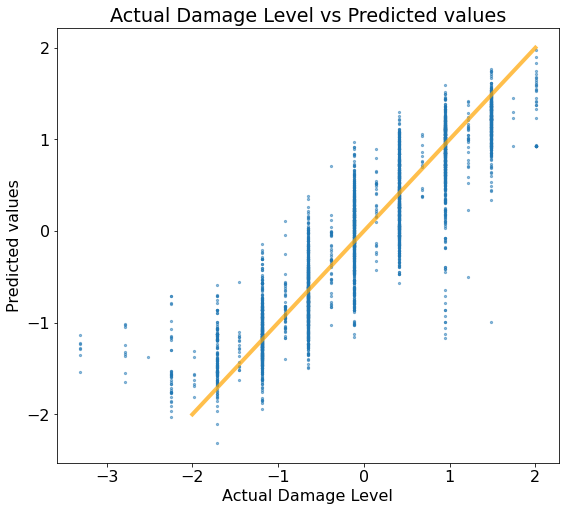

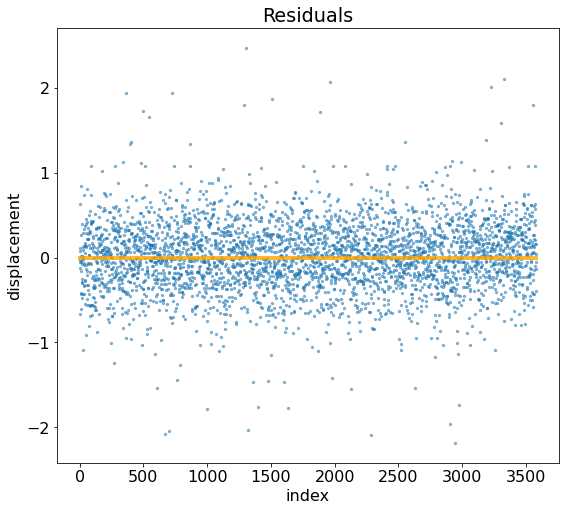

In [ ]:
tf.random.set_seed(7)

model = models.Sequential()
model.add(layers.Dense(5, input_shape=(1,5), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer= optimizers.Adam(),
              loss='mse',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_data, train_label, epochs=150, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

evaluate(model, test_data, test_label)

## **Deformometro 5**

In [ ]:
output_keys = ['Deformometro 5']

input = df[input_keys].values
output = df[output_keys].values

input, output = shuffle(input, output, random_state=0)

split = int(len(output) * 0.8)

train_data, test_data = input[:split,:], input[split:,:]
train_label, test_label = output[:split,:], output[split:,:]
train_data = np.expand_dims(train_data, axis=1)
test_data = np.expand_dims(test_data, axis=1)

### lin reg

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1, 1)              6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
359/359 [==============================] - 1s 2ms/step - loss: 1.7294 - accuracy: 0.0000e+00 - val_loss: 1.2411 - val_accuracy: 0.0000e+00
Epoch 2/150
359/359 [==============================] - 1s 2ms/step - loss: 1.0308 - accuracy: 0.0000e+00 - val_loss: 0.7766 - val_accuracy: 0.0000e+00
Epoch 3/150
359/359 [==============================] - 1s 2ms/step - loss: 0.6586 - accuracy: 0.0000e+00 - val_loss: 0.5250 - val_accuracy: 0.0000e+00
Epoch 4/150
359/359 [==============================] - 1s 2ms/step - loss: 0.4628 - accuracy: 0.0000e+00 - val_loss: 0.3969 - val_accur

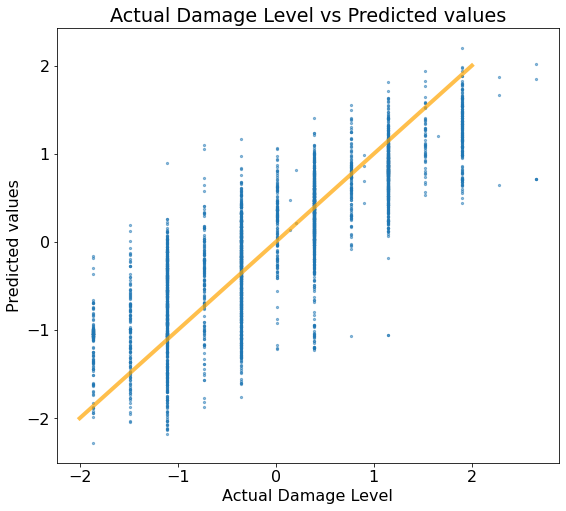

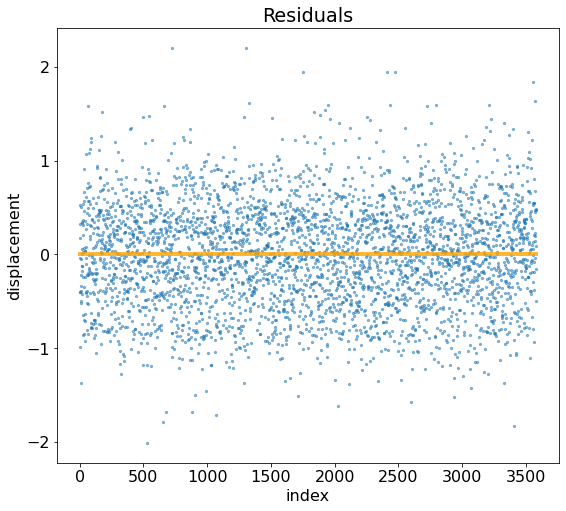

In [ ]:
tf.random.set_seed(7)

model = models.Sequential()
model.add(layers.Dense(1, input_shape=(1,5)))
model.summary()

model.compile(optimizer= optimizers.Adam(),
              loss='mse',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_data, train_label, epochs=150, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

evaluate(model, test_data, test_label)

### FF-NN

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 1, 5)              30        
                                                                 
 dense_18 (Dense)            (None, 1, 16)             96        
                                                                 
 dense_19 (Dense)            (None, 1, 1)              17        
                                                                 
Total params: 143
Trainable params: 143
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
359/359 [==============================] - 1s 3ms/step - loss: 0.4546 - accuracy: 0.0000e+00 - val_loss: 0.3182 - val_accuracy: 0.0000e+00
Epoch 2/150
359/359 [==============================] - 1s 2ms/step - loss: 0.2940 - accuracy: 0.0000e+00 - val_loss: 0.2870 - val_accuracy: 0.0000e+00
Epoch 3/150
359/35

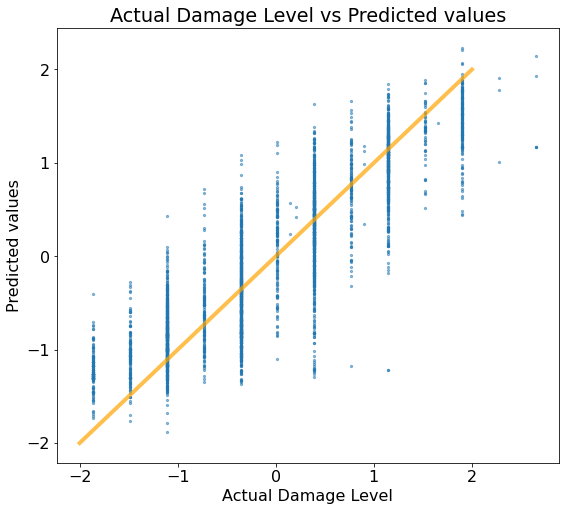

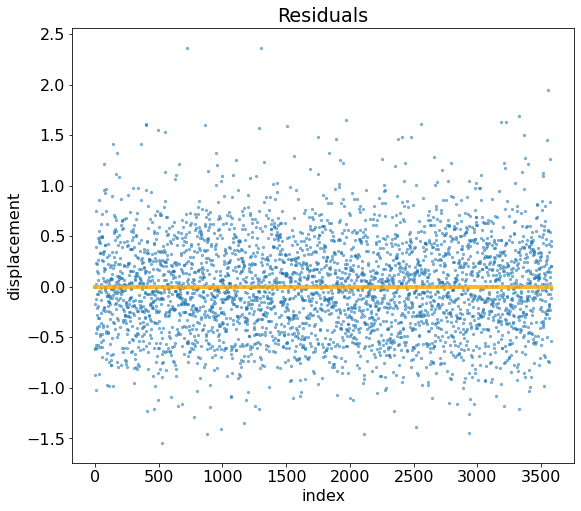

In [ ]:
tf.random.set_seed(7)

model = models.Sequential()
model.add(layers.Dense(5, input_shape=(1,5), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer= optimizers.Adam(),
              loss='mse',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_data, train_label, epochs=150, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

evaluate(model, test_data, test_label)

## **Deformometro 6**

In [ ]:
output_keys = ['Deformometro 6']

input = df[input_keys].values
output = df[output_keys].values

input, output = shuffle(input, output, random_state=0)

split = int(len(output) * 0.8)

train_data, test_data = input[:split,:], input[split:,:]
train_label, test_label = output[:split,:], output[split:,:]
train_data = np.expand_dims(train_data, axis=1)
test_data = np.expand_dims(test_data, axis=1)

### lin reg

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 1, 1)              6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
359/359 [==============================] - 1s 3ms/step - loss: 1.9260 - accuracy: 0.0000e+00 - val_loss: 1.4384 - val_accuracy: 0.0000e+00
Epoch 2/150
359/359 [==============================] - 1s 2ms/step - loss: 1.2359 - accuracy: 0.0000e+00 - val_loss: 0.9630 - val_accuracy: 0.0000e+00
Epoch 3/150
359/359 [==============================] - 1s 2ms/step - loss: 0.8508 - accuracy: 0.0000e+00 - val_loss: 0.7053 - val_accuracy: 0.0000e+00
Epoch 4/150
359/359 [==============================] - 1s 2ms/step - loss: 0.6490 - accuracy: 0.0000e+00 - val_loss: 0.5772 - val_accu

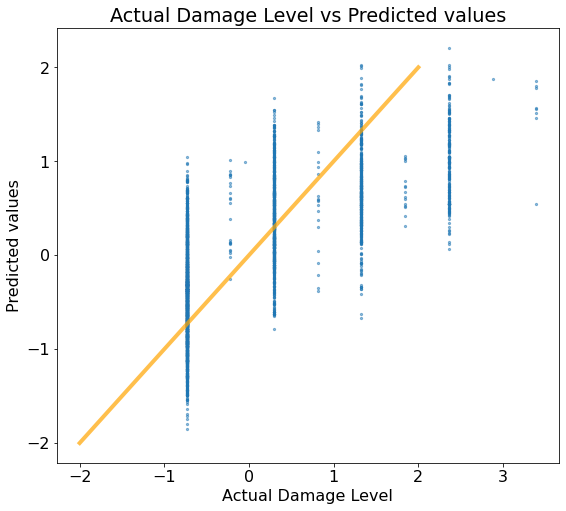

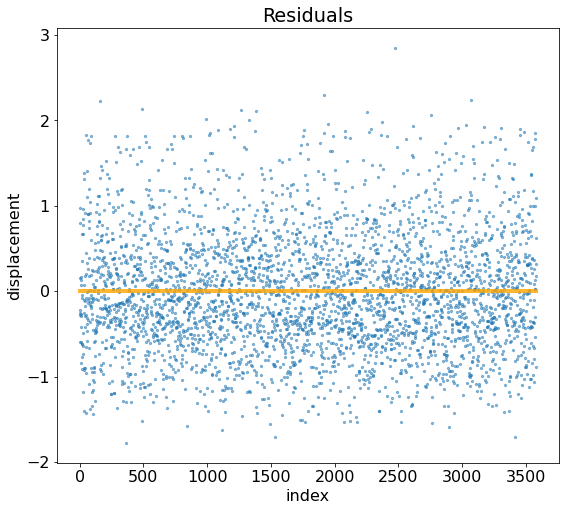

In [ ]:
tf.random.set_seed(7)

model = models.Sequential()
model.add(layers.Dense(1, input_shape=(1,5)))
model.summary()

model.compile(optimizer= optimizers.Adam(),
              loss='mse',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_data, train_label, epochs=150, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

evaluate(model, test_data, test_label)

### FF-NN

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 1, 5)              30        
                                                                 
 dense_50 (Dense)            (None, 1, 16)             96        
                                                                 
 dense_51 (Dense)            (None, 1, 1)              17        
                                                                 
Total params: 143
Trainable params: 143
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
359/359 [==============================] - 2s 3ms/step - loss: 0.6223 - accuracy: 0.0000e+00 - val_loss: 0.4783 - val_accuracy: 0.0000e+00
Epoch 2/150
359/359 [==============================] - 1s 2ms/step - loss: 0.4503 - accuracy: 0.0000e+00 - val_loss: 0.4391 - val_accuracy: 0.0000e+00
Epoch 3/150
359/3

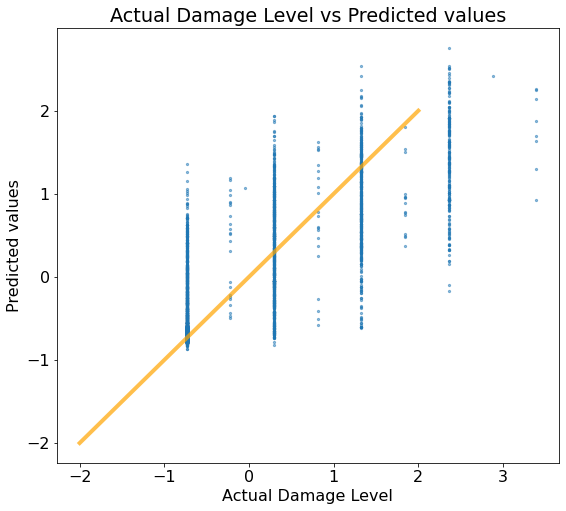

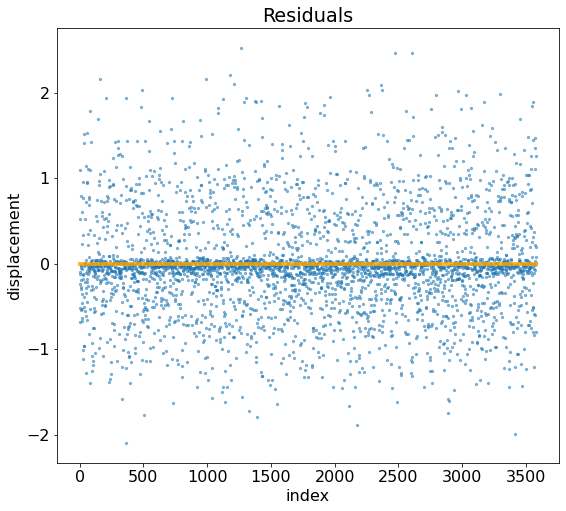

In [ ]:
tf.random.set_seed(7)

model = models.Sequential()
model.add(layers.Dense(5, input_shape=(1,5), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer= optimizers.Adam(),
              loss='mse',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_data, train_label, epochs=150, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

evaluate(model, test_data, test_label)

## **Deformometro 8**

In [ ]:
output_keys = ['Deformometro 8']

input = df[input_keys].values
output = df[output_keys].values

input, output = shuffle(input, output, random_state=0)

split = int(len(output) * 0.8)

train_data, test_data = input[:split,:], input[split:,:]
train_label, test_label = output[:split,:], output[split:,:]
train_data = np.expand_dims(train_data, axis=1)
test_data = np.expand_dims(test_data, axis=1)

### lin reg

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 1, 1)              6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
359/359 [==============================] - 2s 4ms/step - loss: 1.8811 - accuracy: 0.0000e+00 - val_loss: 1.3555 - val_accuracy: 0.0000e+00
Epoch 2/150
359/359 [==============================] - 1s 2ms/step - loss: 1.1207 - accuracy: 0.0000e+00 - val_loss: 0.8232 - val_accuracy: 0.0000e+00
Epoch 3/150
359/359 [==============================] - 1s 2ms/step - loss: 0.6828 - accuracy: 0.0000e+00 - val_loss: 0.5138 - val_accuracy: 0.0000e+00
Epoch 4/150
359/359 [==============================] - 1s 2ms/step - loss: 0.4335 - accuracy: 0.0000e+00 - val_loss: 0.3423 - val_accu

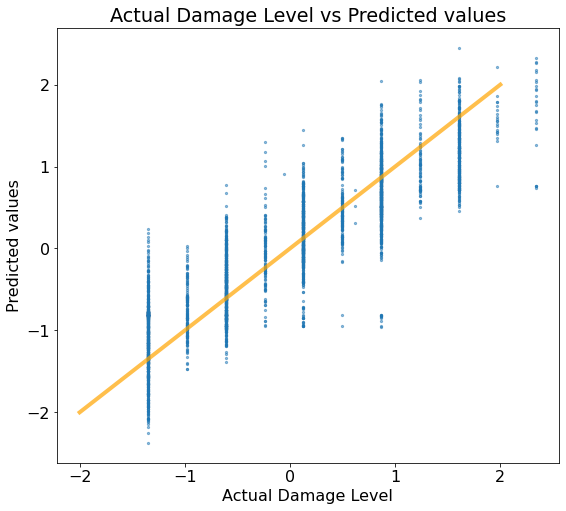

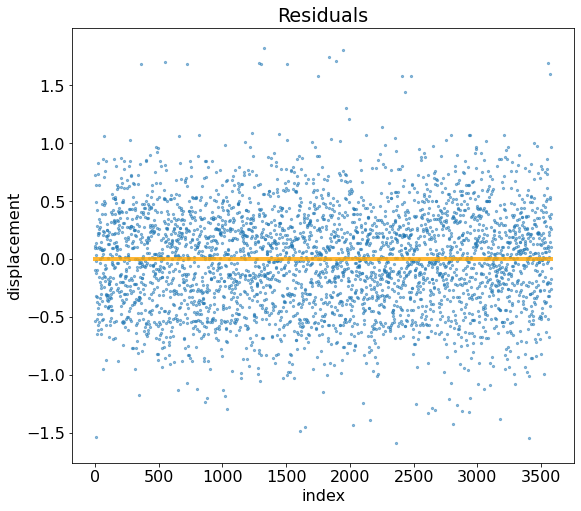

In [ ]:
tf.random.set_seed(7)

model = models.Sequential()
model.add(layers.Dense(1, input_shape=(1,5)))
model.summary()

model.compile(optimizer= optimizers.Adam(),
              loss='mse',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_data, train_label, epochs=150, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

evaluate(model, test_data, test_label)

### FF-NN

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 1, 5)              30        
                                                                 
 dense_54 (Dense)            (None, 1, 16)             96        
                                                                 
 dense_55 (Dense)            (None, 1, 1)              17        
                                                                 
Total params: 143
Trainable params: 143
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
359/359 [==============================] - 2s 3ms/step - loss: 0.3802 - accuracy: 0.0000e+00 - val_loss: 0.2255 - val_accuracy: 0.0000e+00
Epoch 2/150
359/359 [==============================] - 1s 2ms/step - loss: 0.2003 - accuracy: 0.0000e+00 - val_loss: 0.1944 - val_accuracy: 0.0000e+00
Epoch 3/150
359/3

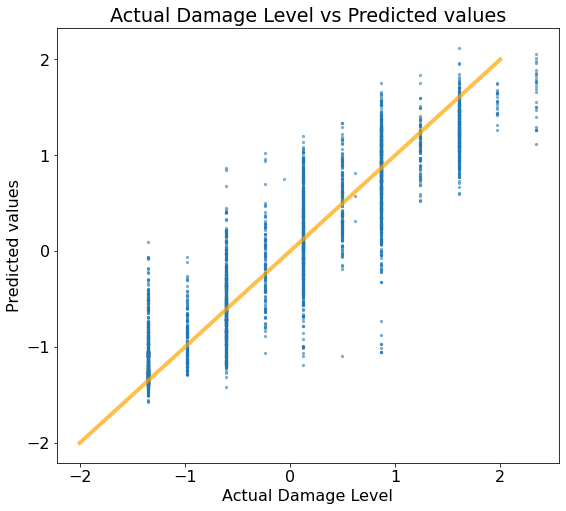

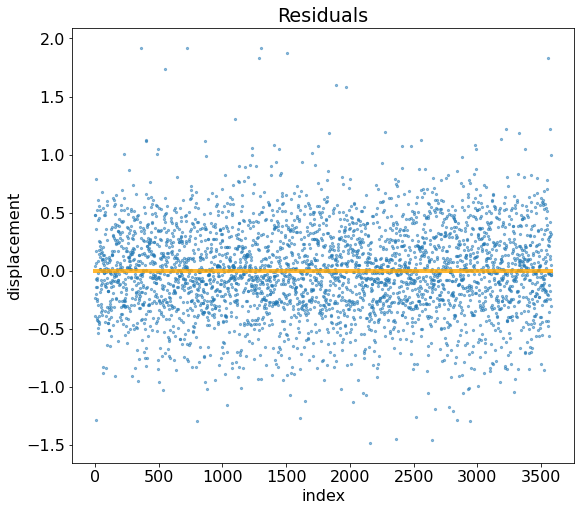

In [ ]:
tf.random.set_seed(7)

model = models.Sequential()
model.add(layers.Dense(5, input_shape=(1,5), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer= optimizers.Adam(),
              loss='mse',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_data, train_label, epochs=150, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

evaluate(model, test_data, test_label)

## **Deformometro 9**

In [ ]:
output_keys = ['Deformometro 9']

input = df[input_keys].values
output = df[output_keys].values

input, output = shuffle(input, output, random_state=0)

split = int(len(output) * 0.8)

train_data, test_data = input[:split,:], input[split:,:]
train_label, test_label = output[:split,:], output[split:,:]
train_data = np.expand_dims(train_data, axis=1)
test_data = np.expand_dims(test_data, axis=1)

### lin reg

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 1, 1)              6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
359/359 [==============================] - 1s 2ms/step - loss: 1.9852 - accuracy: 0.0000e+00 - val_loss: 1.5151 - val_accuracy: 0.0000e+00
Epoch 2/150
359/359 [==============================] - 1s 2ms/step - loss: 1.2604 - accuracy: 0.0000e+00 - val_loss: 1.0017 - val_accuracy: 0.0000e+00
Epoch 3/150
359/359 [==============================] - 1s 2ms/step - loss: 0.8486 - accuracy: 0.0000e+00 - val_loss: 0.7151 - val_accuracy: 0.0000e+00
Epoch 4/150
359/359 [==============================] - 1s 2ms/step - loss: 0.6271 - accuracy: 0.0000e+00 - val_loss: 0.5662 - val_accu

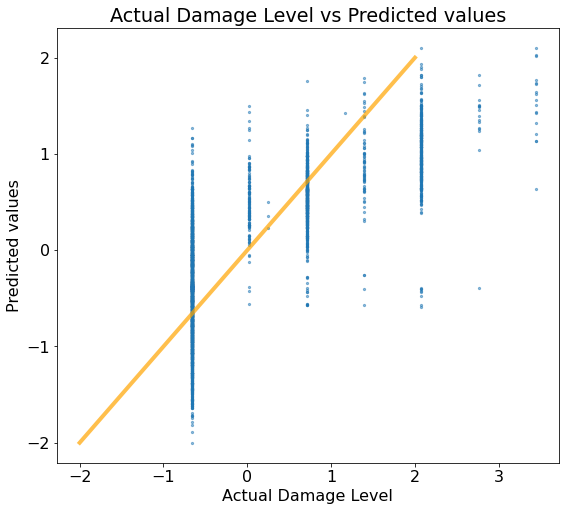

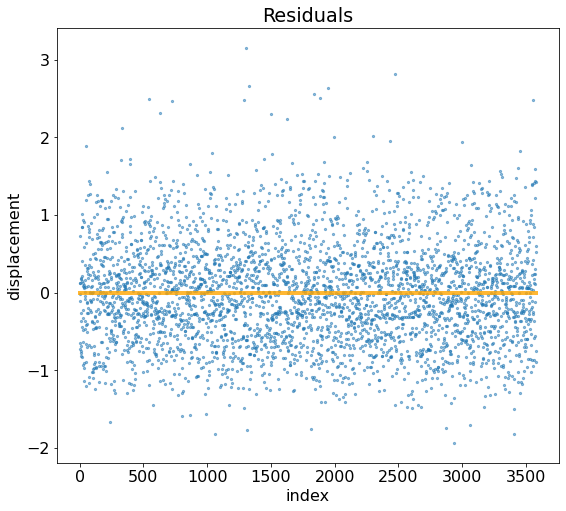

In [ ]:
tf.random.set_seed(7)

model = models.Sequential()
model.add(layers.Dense(1, input_shape=(1,5)))
model.summary()

model.compile(optimizer= optimizers.Adam(),
              loss='mse',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_data, train_label, epochs=150, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

evaluate(model, test_data, test_label)

### FF-NN

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 1, 5)              30        
                                                                 
 dense_77 (Dense)            (None, 1, 16)             96        
                                                                 
 dense_78 (Dense)            (None, 1, 1)              17        
                                                                 
Total params: 143
Trainable params: 143
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
359/359 [==============================] - 2s 3ms/step - loss: 0.5230 - accuracy: 0.0000e+00 - val_loss: 0.3229 - val_accuracy: 0.0000e+00
Epoch 2/150
359/359 [==============================] - 1s 2ms/step - loss: 0.2894 - accuracy: 0.0000e+00 - val_loss: 0.2665 - val_accuracy: 0.0000e+00
Epoch 3/150
359/3

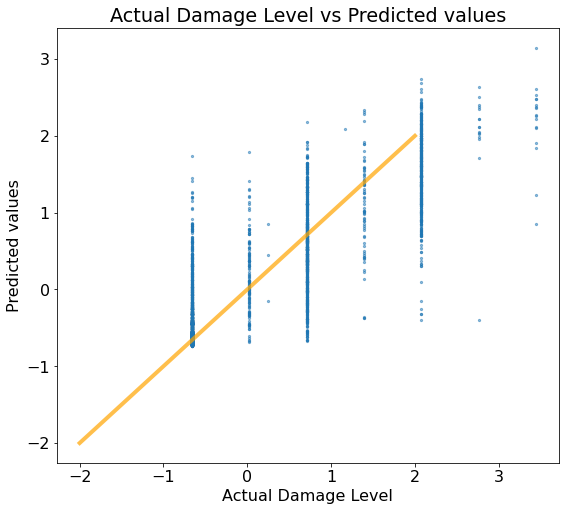

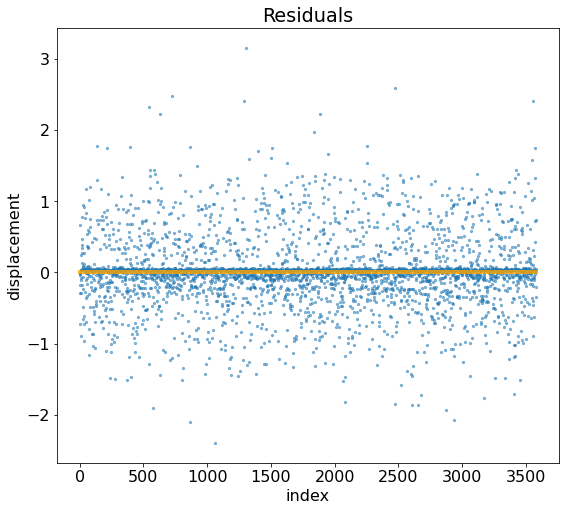

In [ ]:
tf.random.set_seed(7)

model = models.Sequential()
model.add(layers.Dense(5, input_shape=(1,5), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer= optimizers.Adam(),
              loss='mse',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_data, train_label, epochs=150, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

evaluate(model, test_data, test_label)

## **Deformometro 11**

In [ ]:
output_keys = ['Deformometro 11']

input = df[input_keys].values
output = df[output_keys].values

input, output = shuffle(input, output, random_state=0)

split = int(len(output) * 0.8)

train_data, test_data = input[:split,:], input[split:,:]
train_label, test_label = output[:split,:], output[split:,:]
train_data = np.expand_dims(train_data, axis=1)
test_data = np.expand_dims(test_data, axis=1)

### lin reg

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 1, 1)              6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
359/359 [==============================] - 2s 5ms/step - loss: 2.0262 - accuracy: 0.0000e+00 - val_loss: 1.4918 - val_accuracy: 0.0000e+00
Epoch 2/150
359/359 [==============================] - 2s 4ms/step - loss: 1.2930 - accuracy: 0.0000e+00 - val_loss: 0.9909 - val_accuracy: 0.0000e+00
Epoch 3/150
359/359 [==============================] - 2s 4ms/step - loss: 0.8835 - accuracy: 0.0000e+00 - val_loss: 0.7212 - val_accuracy: 0.0000e+00
Epoch 4/150
359/359 [==============================] - 1s 4ms/step - loss: 0.6708 - accuracy: 0.0000e+00 - val_loss: 0.5908 - val_accu

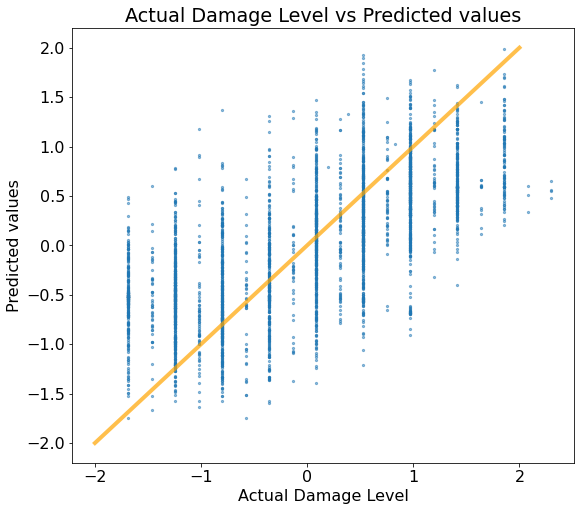

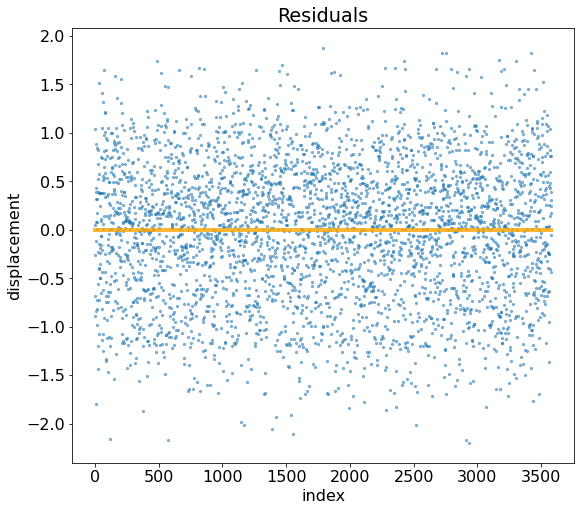

In [ ]:
tf.random.set_seed(7)

model = models.Sequential()
model.add(layers.Dense(1, input_shape=(1,5)))
model.summary()

model.compile(optimizer= optimizers.Adam(),
              loss='mse',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_data, train_label, epochs=150, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

evaluate(model, test_data, test_label)

### FF-NN

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 1, 5)              30        
                                                                 
 dense_62 (Dense)            (None, 1, 16)             96        
                                                                 
 dense_63 (Dense)            (None, 1, 1)              17        
                                                                 
Total params: 143
Trainable params: 143
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
359/359 [==============================] - 2s 3ms/step - loss: 0.6372 - accuracy: 0.0000e+00 - val_loss: 0.5185 - val_accuracy: 0.0000e+00
Epoch 2/150
359/359 [==============================] - 1s 2ms/step - loss: 0.4875 - accuracy: 0.0000e+00 - val_loss: 0.4746 - val_accuracy: 0.0000e+00
Epoch 3/150
359/3

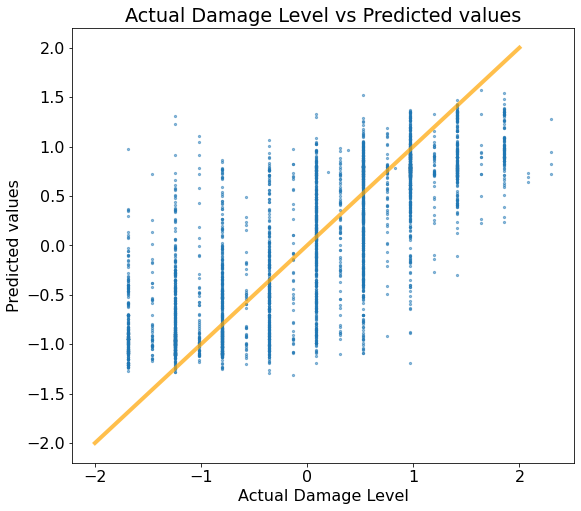

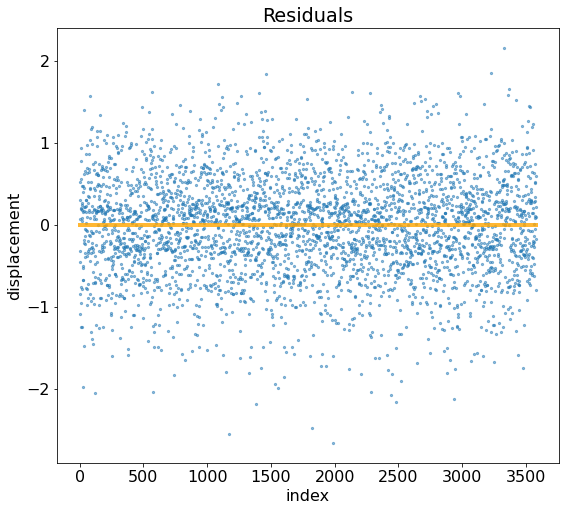

In [ ]:
tf.random.set_seed(7)

model = models.Sequential()
model.add(layers.Dense(5, input_shape=(1,5), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer= optimizers.Adam(),
              loss='mse',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_data, train_label, epochs=150, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

evaluate(model, test_data, test_label)

## **Deformometro 12**

In [ ]:
output_keys = ['Deformometro 12']

input = df[input_keys].values
output = df[output_keys].values

input, output = shuffle(input, output, random_state=0)

split = int(len(output) * 0.8)

train_data, test_data = input[:split,:], input[split:,:]
train_label, test_label = output[:split,:], output[split:,:]
train_data = np.expand_dims(train_data, axis=1)
test_data = np.expand_dims(test_data, axis=1)

### lin reg

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 1, 1)              6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
359/359 [==============================] - 1s 3ms/step - loss: 1.8846 - accuracy: 0.0000e+00 - val_loss: 1.3652 - val_accuracy: 0.0000e+00
Epoch 2/150
359/359 [==============================] - 1s 3ms/step - loss: 1.1291 - accuracy: 0.0000e+00 - val_loss: 0.8527 - val_accuracy: 0.0000e+00
Epoch 3/150
359/359 [==============================] - 1s 2ms/step - loss: 0.7122 - accuracy: 0.0000e+00 - val_loss: 0.5669 - val_accuracy: 0.0000e+00
Epoch 4/150
359/359 [==============================] - 1s 2ms/step - loss: 0.4862 - accuracy: 0.0000e+00 - val_loss: 0.4180 - val_accu

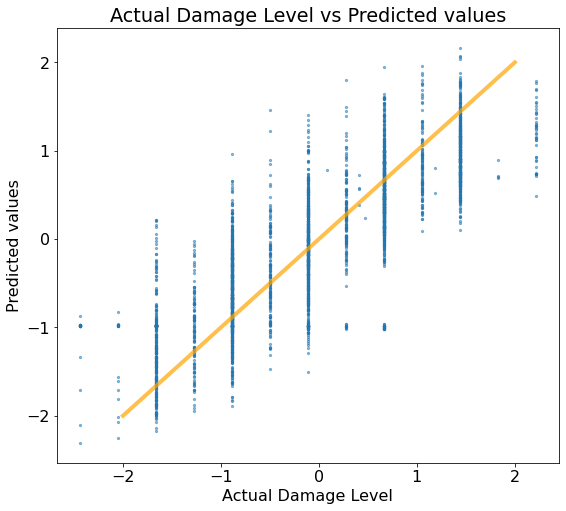

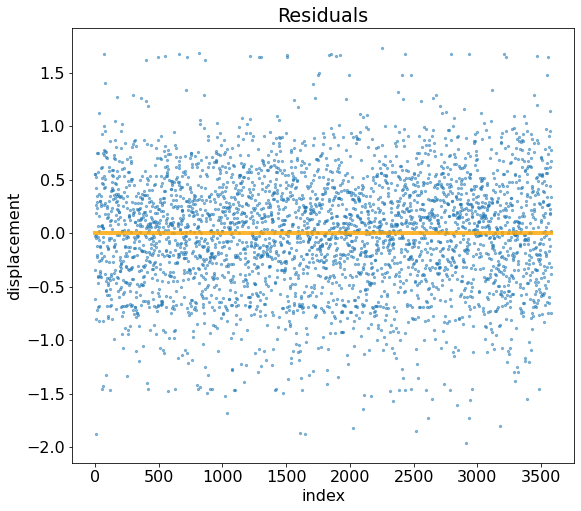

In [ ]:
tf.random.set_seed(7)

model = models.Sequential()
model.add(layers.Dense(1, input_shape=(1,5)))
model.summary()

model.compile(optimizer= optimizers.Adam(),
              loss='mse',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_data, train_label, epochs=150, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

evaluate(model, test_data, test_label)

### FF-NN

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 1, 5)              30        
                                                                 
 dense_66 (Dense)            (None, 1, 16)             96        
                                                                 
 dense_67 (Dense)            (None, 1, 1)              17        
                                                                 
Total params: 143
Trainable params: 143
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
359/359 [==============================] - 2s 3ms/step - loss: 0.4508 - accuracy: 0.0000e+00 - val_loss: 0.3328 - val_accuracy: 0.0000e+00
Epoch 2/150
359/359 [==============================] - 1s 2ms/step - loss: 0.2967 - accuracy: 0.0000e+00 - val_loss: 0.3053 - val_accuracy: 0.0000e+00
Epoch 3/150
359/3

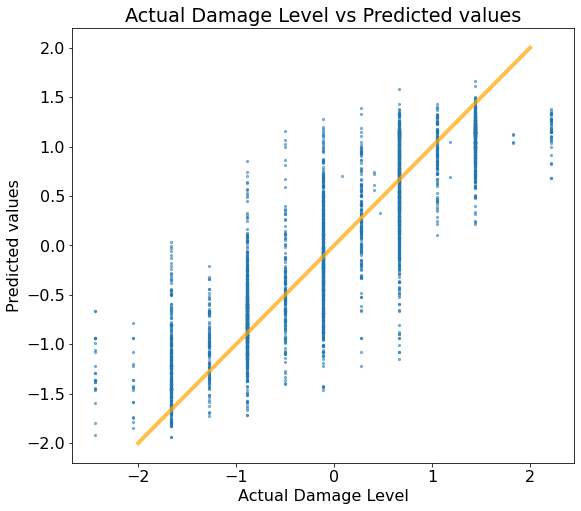

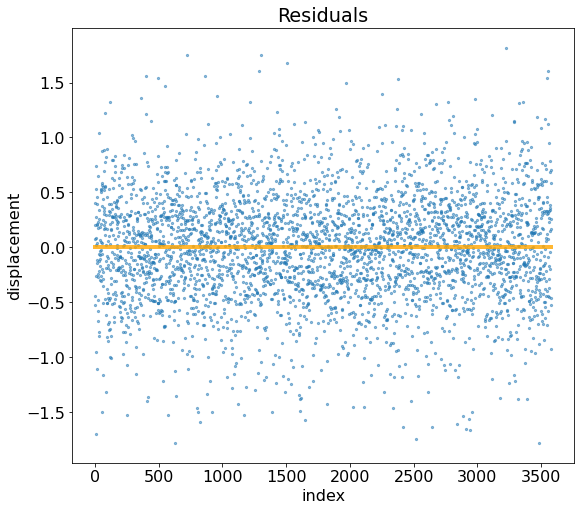

In [ ]:
tf.random.set_seed(7)

model = models.Sequential()
model.add(layers.Dense(5, input_shape=(1,5), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer= optimizers.Adam(),
              loss='mse',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_data, train_label, epochs=150, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

evaluate(model, test_data, test_label)

## **'TEL. 1 VERT. EST DIR. E-O**

In [ ]:
output_keys = ['TEL. 1 VERT. EST DIR. E-O']

input = df[input_keys].values
output = df[output_keys].values

input, output = shuffle(input, output, random_state=0)

split = int(len(output) * 0.8)

train_data, test_data = input[:split,:], input[split:,:]
train_label, test_label = output[:split,:], output[split:,:]
train_data = np.expand_dims(train_data, axis=1)
test_data = np.expand_dims(test_data, axis=1)

### lin reg

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 1, 1)              6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
359/359 [==============================] - 2s 4ms/step - loss: 2.3674 - accuracy: 0.0000e+00 - val_loss: 1.8772 - val_accuracy: 0.0000e+00
Epoch 2/150
359/359 [==============================] - 1s 2ms/step - loss: 1.5361 - accuracy: 0.0000e+00 - val_loss: 1.2835 - val_accuracy: 0.0000e+00
Epoch 3/150
359/359 [==============================] - 1s 2ms/step - loss: 1.0800 - accuracy: 0.0000e+00 - val_loss: 0.9692 - val_accuracy: 0.0000e+00
Epoch 4/150
359/359 [==============================] - 1s 2ms/step - loss: 0.8520 - accuracy: 0.0000e+00 - val_loss: 0.8196 - val_accu

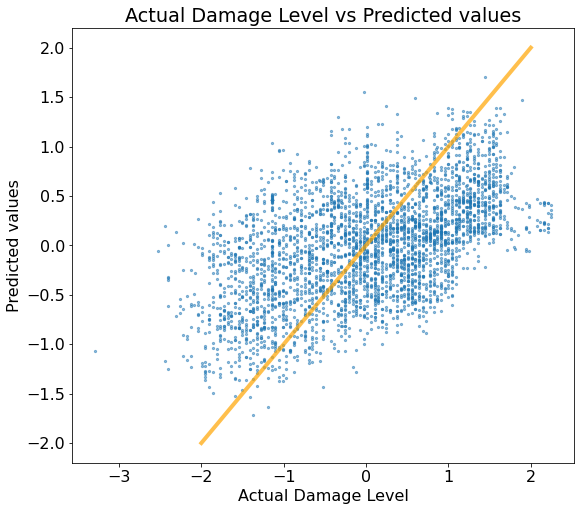

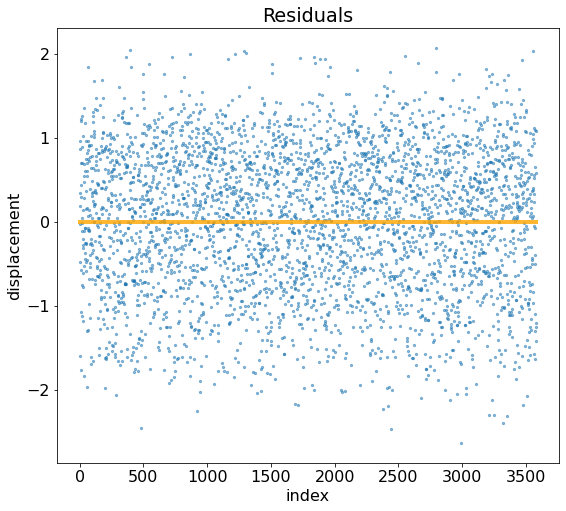

In [ ]:
tf.random.set_seed(7)

model = models.Sequential()
model.add(layers.Dense(1, input_shape=(1,5)))
model.summary()

model.compile(optimizer= optimizers.Adam(),
              loss='mse',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_data, train_label, epochs=150, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

evaluate(model, test_data, test_label)

### FF-NN

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 1, 5)              30        
                                                                 
 dense_81 (Dense)            (None, 1, 16)             96        
                                                                 
 dense_82 (Dense)            (None, 1, 1)              17        
                                                                 
Total params: 143
Trainable params: 143
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
359/359 [==============================] - 2s 3ms/step - loss: 0.7751 - accuracy: 0.0000e+00 - val_loss: 0.7167 - val_accuracy: 0.0000e+00
Epoch 2/150
359/359 [==============================] - 1s 2ms/step - loss: 0.6663 - accuracy: 0.0000e+00 - val_loss: 0.6753 - val_accuracy: 0.0000e+00
Epoch 3/150
359/3

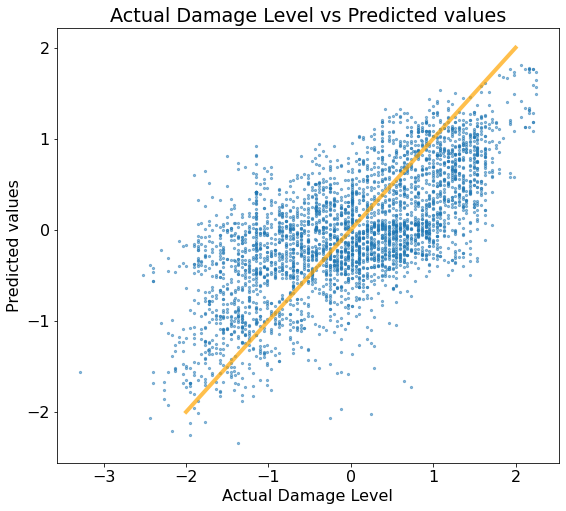

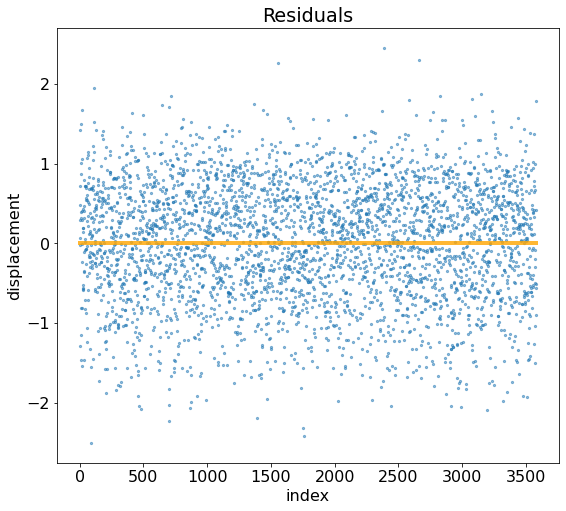

In [ ]:
tf.random.set_seed(7)

model = models.Sequential()
model.add(layers.Dense(5, input_shape=(1,5), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer= optimizers.Adam(),
              loss='mse',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_data, train_label, epochs=150, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

evaluate(model, test_data, test_label)

## **'TEL. 1 VERT. EST DIR. N-S**

In [ ]:
output_keys = ['TEL. 1 VERT. EST DIR. N-S']

input = df[input_keys].values
output = df[output_keys].values

input, output = shuffle(input, output, random_state=0)

split = int(len(output) * 0.8)

train_data, test_data = input[:split,:], input[split:,:]
train_label, test_label = output[:split,:], output[split:,:]
train_data = np.expand_dims(train_data, axis=1)
test_data = np.expand_dims(test_data, axis=1)

### lin reg

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 1, 1)              6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
359/359 [==============================] - 1s 2ms/step - loss: 2.4883 - accuracy: 0.0000e+00 - val_loss: 1.9977 - val_accuracy: 0.0000e+00
Epoch 2/150
359/359 [==============================] - 1s 2ms/step - loss: 1.6087 - accuracy: 0.0000e+00 - val_loss: 1.3657 - val_accuracy: 0.0000e+00
Epoch 3/150
359/359 [==============================] - 1s 2ms/step - loss: 1.1273 - accuracy: 0.0000e+00 - val_loss: 1.0229 - val_accuracy: 0.0000e+00
Epoch 4/150
359/359 [==============================] - 1s 2ms/step - loss: 0.8836 - accuracy: 0.0000e+00 - val_loss: 0.8555 - val_accu

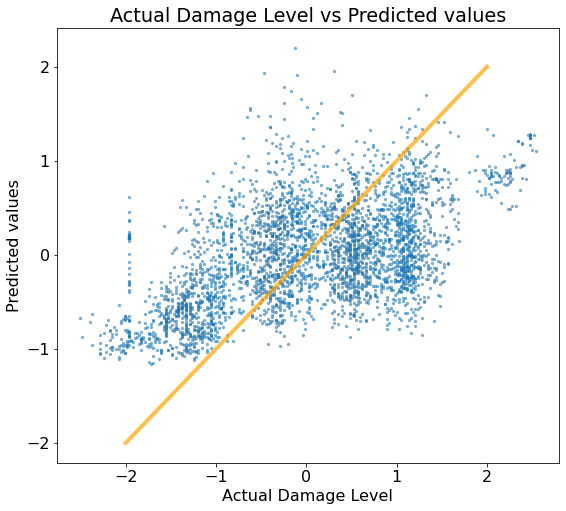

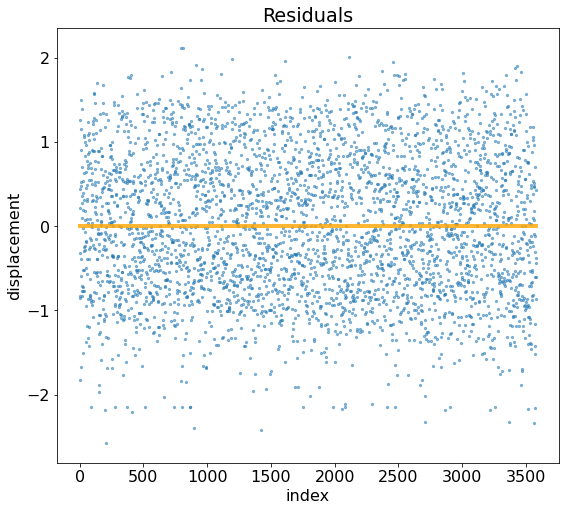

In [ ]:
tf.random.set_seed(7)

model = models.Sequential()
model.add(layers.Dense(1, input_shape=(1,5)))
model.summary()

model.compile(optimizer= optimizers.Adam(),
              loss='mse',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_data, train_label, epochs=150, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

evaluate(model, test_data, test_label)

### FF-NN

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 1, 5)              30        
                                                                 
 dense_74 (Dense)            (None, 1, 16)             96        
                                                                 
 dense_75 (Dense)            (None, 1, 1)              17        
                                                                 
Total params: 143
Trainable params: 143
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
359/359 [==============================] - 2s 3ms/step - loss: 0.7960 - accuracy: 0.0000e+00 - val_loss: 0.7084 - val_accuracy: 0.0000e+00
Epoch 2/150
359/359 [==============================] - 1s 2ms/step - loss: 0.6342 - accuracy: 0.0000e+00 - val_loss: 0.6142 - val_accuracy: 0.0000e+00
Epoch 3/150
359/3

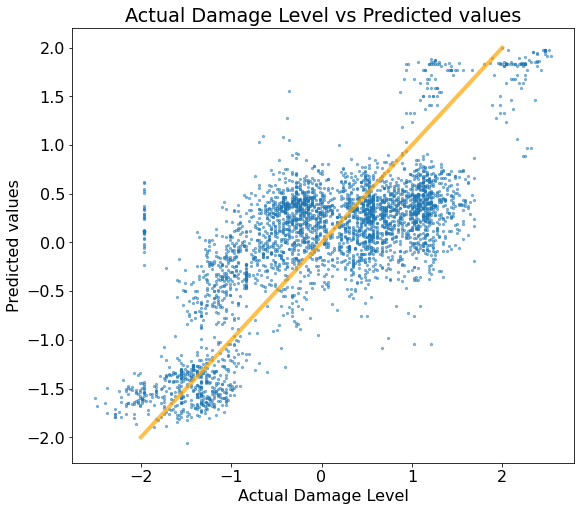

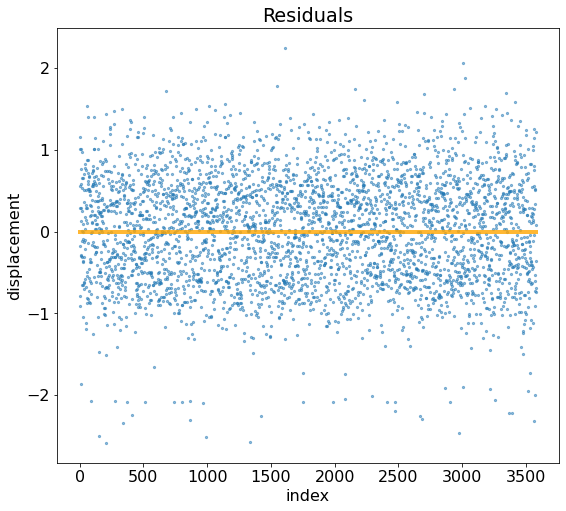

In [ ]:
tf.random.set_seed(7)

model = models.Sequential()
model.add(layers.Dense(5, input_shape=(1,5), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer= optimizers.Adam(),
              loss='mse',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_data, train_label, epochs=150, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

evaluate(model, test_data, test_label)

## **TEL. 0 VERT. SUD DIR. N-S**

In [ ]:
output_keys = ['TEL. 0 VERT. SUD DIR. N-S']

input = df[input_keys].values
output = df[output_keys].values

input, output = shuffle(input, output, random_state=0)

split = int(len(output) * 0.8)

train_data, test_data = input[:split,:], input[split:,:]
train_label, test_label = output[:split,:], output[split:,:]
train_data = np.expand_dims(train_data, axis=1)
test_data = np.expand_dims(test_data, axis=1)

### lin reg

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 1, 1)              6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
359/359 [==============================] - 1s 2ms/step - loss: 2.5012 - accuracy: 0.0000e+00 - val_loss: 1.9972 - val_accuracy: 0.0000e+00
Epoch 2/150
359/359 [==============================] - 1s 2ms/step - loss: 1.6001 - accuracy: 0.0000e+00 - val_loss: 1.3479 - val_accuracy: 0.0000e+00
Epoch 3/150
359/359 [==============================] - 1s 2ms/step - loss: 1.1078 - accuracy: 0.0000e+00 - val_loss: 1.0003 - val_accuracy: 0.0000e+00
Epoch 4/150
359/359 [==============================] - 1s 2ms/step - loss: 0.8625 - accuracy: 0.0000e+00 - val_loss: 0.8345 - val_accu

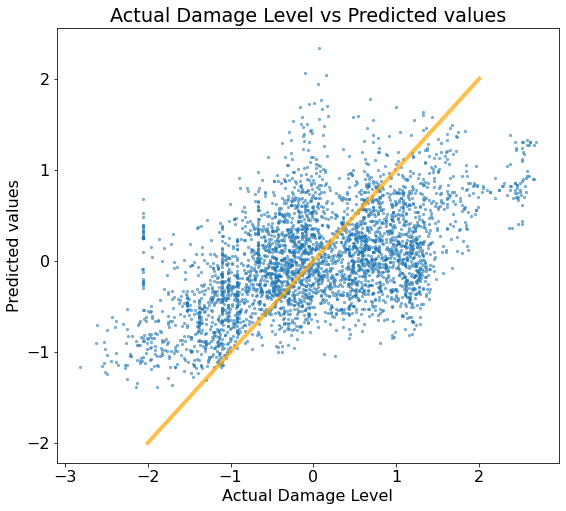

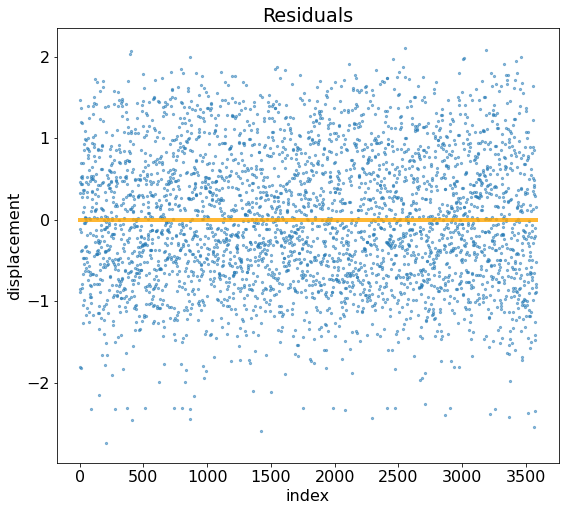

In [ ]:
tf.random.set_seed(7)

model = models.Sequential()
model.add(layers.Dense(1, input_shape=(1,5)))
model.summary()

model.compile(optimizer= optimizers.Adam(),
              loss='mse',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_data, train_label, epochs=150, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

evaluate(model, test_data, test_label)

### FF-NN

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 1, 5)              30        
                                                                 
 dense_42 (Dense)            (None, 1, 16)             96        
                                                                 
 dense_43 (Dense)            (None, 1, 1)              17        
                                                                 
Total params: 143
Trainable params: 143
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
359/359 [==============================] - 1s 3ms/step - loss: 0.8038 - accuracy: 0.0000e+00 - val_loss: 0.7244 - val_accuracy: 0.0000e+00
Epoch 2/150
359/359 [==============================] - 1s 2ms/step - loss: 0.6483 - accuracy: 0.0000e+00 - val_loss: 0.6204 - val_accuracy: 0.0000e+00
Epoch 3/150
359/3

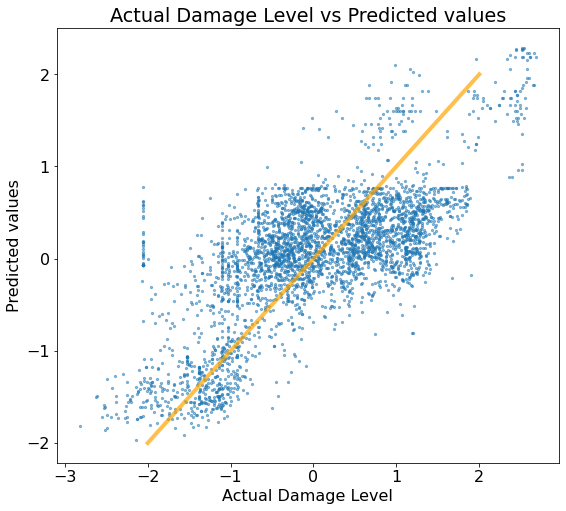

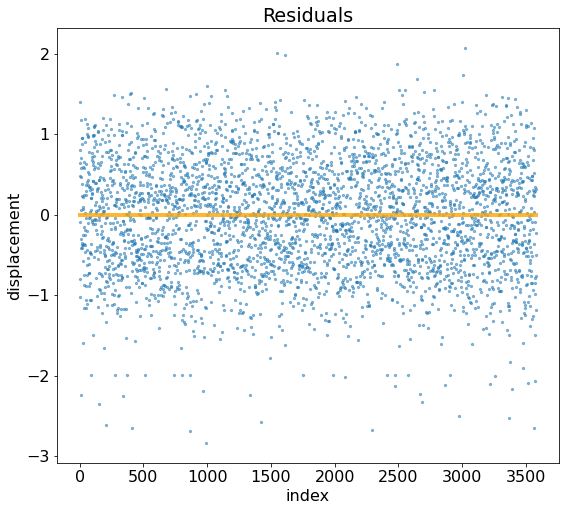

In [ ]:
tf.random.set_seed(7)

model = models.Sequential()
model.add(layers.Dense(5, input_shape=(1,5), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer= optimizers.Adam(),
              loss='mse',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_data, train_label, epochs=150, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

evaluate(model, test_data, test_label)

## **TEL. 0 VERT. SUD DIR. E-O'**

In [ ]:
output_keys = ['TEL. 0 VERT. SUD DIR. E-O']

input = df[input_keys].values
output = df[output_keys].values

input, output = shuffle(input, output, random_state=0)

split = int(len(output) * 0.8)

train_data, test_data = input[:split,:], input[split:,:]
train_label, test_label = output[:split,:], output[split:,:]
train_data = np.expand_dims(train_data, axis=1)
test_data = np.expand_dims(test_data, axis=1)

### lin reg

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 1, 1)              6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
359/359 [==============================] - 1s 3ms/step - loss: 1.9642 - accuracy: 0.0000e+00 - val_loss: 1.4664 - val_accuracy: 0.0000e+00
Epoch 2/150
359/359 [==============================] - 1s 3ms/step - loss: 1.2593 - accuracy: 0.0000e+00 - val_loss: 0.9858 - val_accuracy: 0.0000e+00
Epoch 3/150
359/359 [==============================] - 1s 3ms/step - loss: 0.8880 - accuracy: 0.0000e+00 - val_loss: 0.7364 - val_accuracy: 0.0000e+00
Epoch 4/150
359/359 [==============================] - 1s 3ms/step - loss: 0.7066 - accuracy: 0.0000e+00 - val_loss: 0.6219 - val_accu

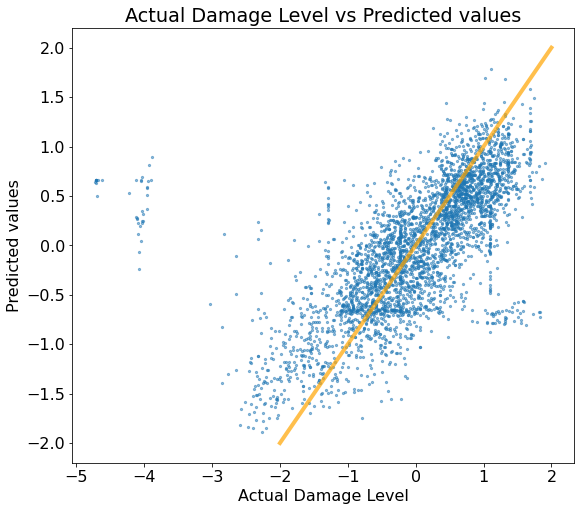

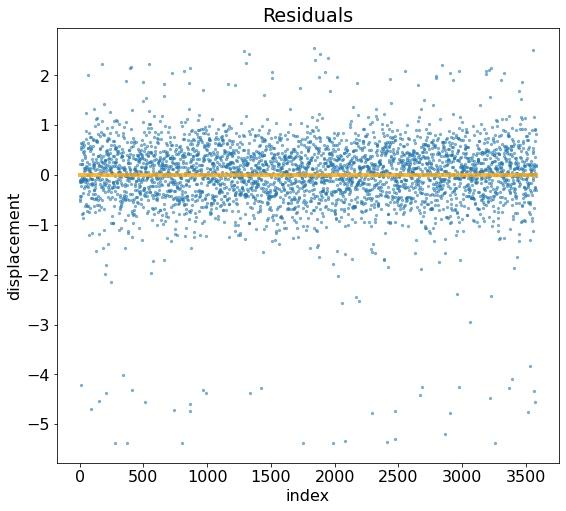

In [ ]:
tf.random.set_seed(7)

model = models.Sequential()
model.add(layers.Dense(1, input_shape=(1,5)))
model.summary()

model.compile(optimizer= optimizers.Adam(),
              loss='mse',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_data, train_label, epochs=150, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

evaluate(model, test_data, test_label)

### FF-NN

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 1, 5)              30        
                                                                 
 dense_46 (Dense)            (None, 1, 16)             96        
                                                                 
 dense_47 (Dense)            (None, 1, 1)              17        
                                                                 
Total params: 143
Trainable params: 143
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
359/359 [==============================] - 1s 3ms/step - loss: 0.6714 - accuracy: 0.0000e+00 - val_loss: 0.5383 - val_accuracy: 0.0000e+00
Epoch 2/150
359/359 [==============================] - 1s 2ms/step - loss: 0.5611 - accuracy: 0.0000e+00 - val_loss: 0.5154 - val_accuracy: 0.0000e+00
Epoch 3/150
359/3

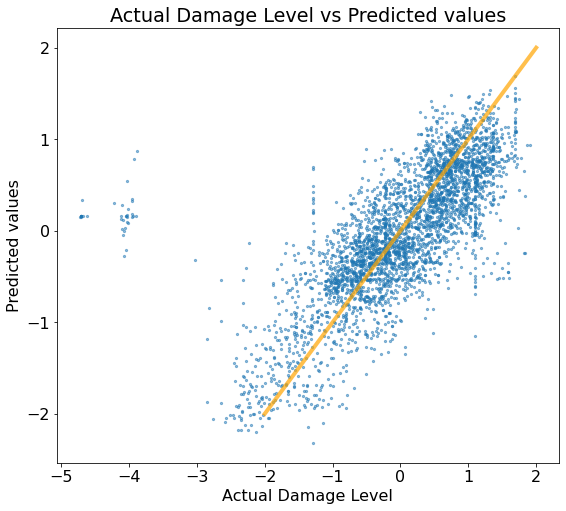

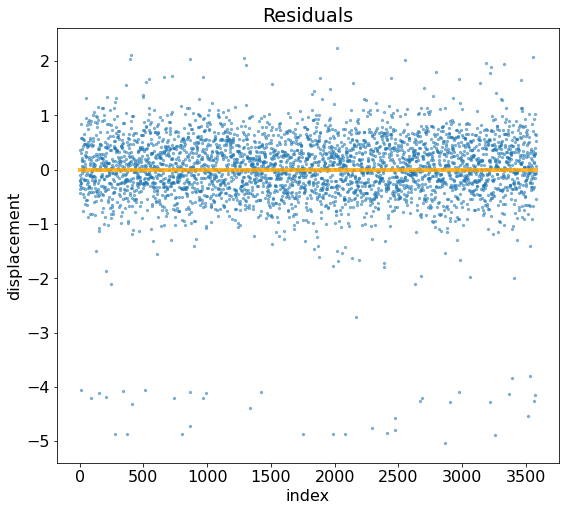

In [ ]:
tf.random.set_seed(7)

model = models.Sequential()
model.add(layers.Dense(5, input_shape=(1,5), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer= optimizers.Adam(),
              loss='mse',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_data, train_label, epochs=150, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

evaluate(model, test_data, test_label)